<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/Warmup_TS_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings


# Warm Up

Para a série de dados abaixo:

1. Construa um **modelo de regressão linear** e ao menos um **não linear**.
2. Faça um ***forecast*** dos próximos 60 dias
3. Em seguida, aprenderemos como ajustar os dados para obter predições a partir dos valores anteriores da própria série (componentes autoregressivas) aplicando os regressores

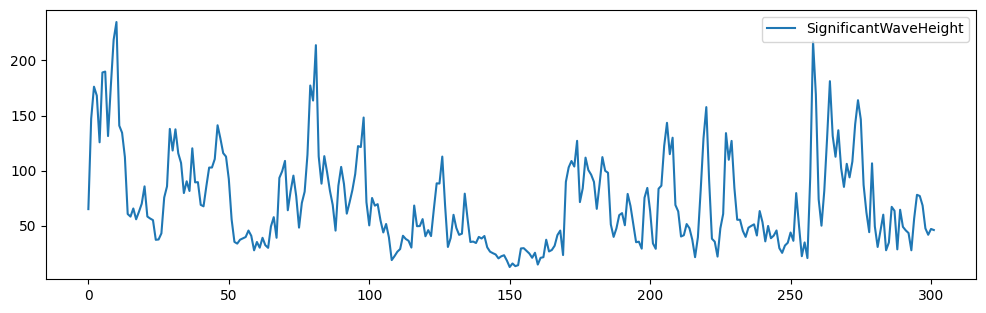

In [ ]:
df = pd.read_csv('https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/IWaveBNetworkD.csv',skiprows=[1])

plt.figure(figsize=(12,3.5))

sns.lineplot(df)
plt.legend(loc='upper right')
plt.show()

In [ ]:
df.head()

,time,SignificantWaveHeight
0,2023-01-02 00:00:00+00:00,64.979167
1,2023-01-03 00:00:00+00:00,147.041667
2,2023-01-04 00:00:00+00:00,176.166667
3,2023-01-05 00:00:00+00:00,168.062500
4,2023-01-06 00:00:00+00:00,125.666667


# Modelo de Regressão Linear e não Linear

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = pd.DataFrame(np.arange(0,len(df)))
y = df[['SignificantWaveHeight']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

mape = np.mean(np.abs(y_pred - y_test.values)/np.abs(y_test.values))


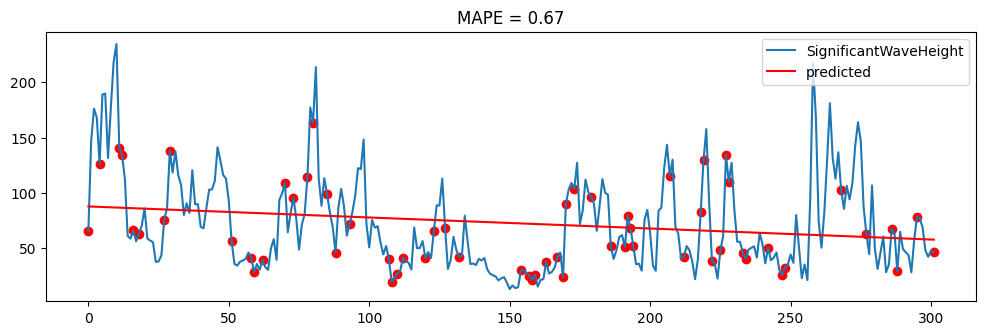

In [ ]:
plt.figure(figsize=(12,3.5))

sns.lineplot(df)
plt.scatter(X_test,y_test,color='r')
plt.plot(reg.predict(X),'r',label='predicted')

plt.title(f'MAPE = {mape:.2f}')
plt.legend(loc='upper right')

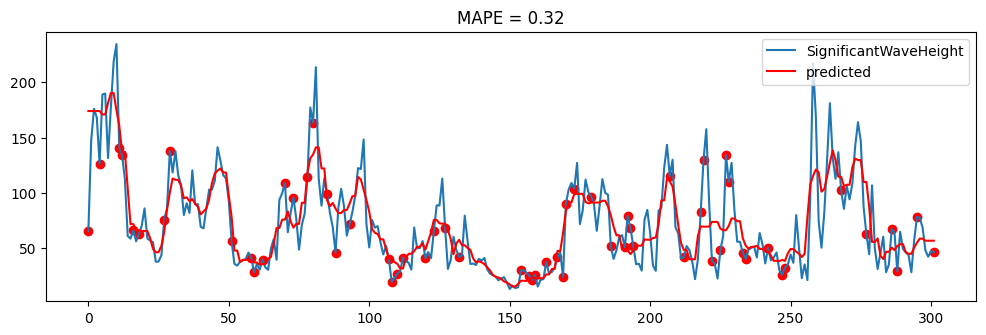

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

X = pd.DataFrame(np.arange(0,len(df)))
y = df[['SignificantWaveHeight']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

reg = KNeighborsRegressor()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

mape = np.mean(np.abs(y_pred - y_test.values)/np.abs(y_test.values))

plt.figure(figsize=(12,3.5))

sns.lineplot(df)
plt.scatter(X_test,y_test,color='r')
plt.plot(reg.predict(X),'r',label='predicted')

plt.title(f'MAPE = {mape:.2f}')
plt.legend(loc='upper right')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


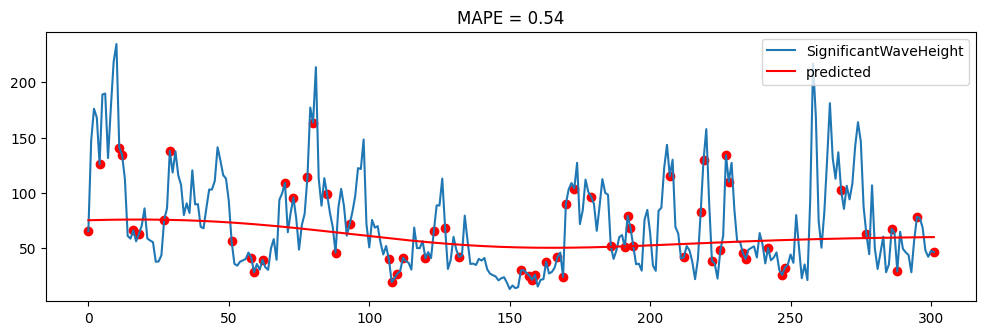

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

X = pd.DataFrame(np.arange(0,len(df)))
y = df[['SignificantWaveHeight']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

reg = SVR()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

mape = np.mean(np.abs(y_pred - y_test.values)/np.abs(y_test.values))

plt.figure(figsize=(12,3.5))

sns.lineplot(df)
plt.scatter(X_test,y_test,color='r')
plt.plot(reg.predict(X),'r',label='predicted')

plt.title(f'MAPE = {mape:.2f}')
plt.legend(loc='upper right')

plt.show()

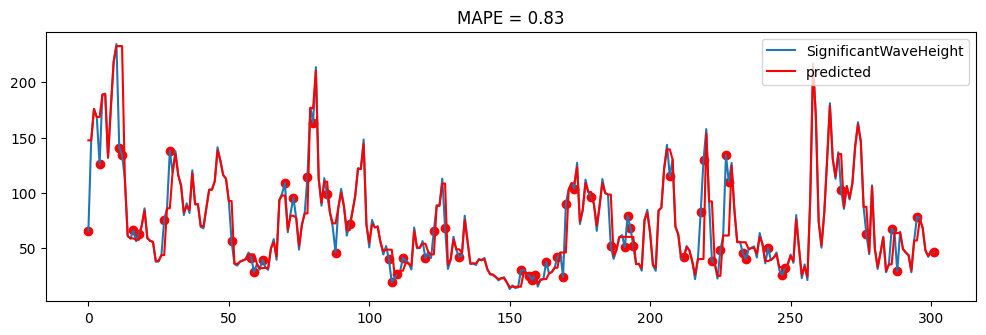

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

X = pd.DataFrame(np.arange(0,len(df)))
y = df[['SignificantWaveHeight']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

reg = XGBRegressor()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

mape = np.mean(np.abs(y_pred - y_test.values)/np.abs(y_test.values))

plt.figure(figsize=(12,3.5))

sns.lineplot(df)
plt.scatter(X_test,y_test,color='r')
plt.plot(reg.predict(X),'r',label='predicted')

plt.title(f'MAPE = {mape:.2f}')
plt.legend(loc='upper right')

plt.show()

# Forecast

In [ ]:
X_forecast = pd.DataFrame(np.arange(300,360))
y_forecast = reg.predict(X_forecast)

y_forecast

array([47.102776, 47.102776, 47.102776, 47.102776, 47.102776, 47.102776,
       47.102776, 47.102776, 47.102776, 47.102776, 47.102776, 47.102776,
       47.102776, 47.102776, 47.102776, 47.102776, 47.102776, 47.102776,
       47.102776, 47.102776, 47.102776, 47.102776, 47.102776, 47.102776,
       47.102776, 47.102776, 47.102776, 47.102776, 47.102776, 47.102776,
       47.102776, 47.102776, 47.102776, 47.102776, 47.102776, 47.102776,
       47.102776, 47.102776, 47.102776, 47.102776, 47.102776, 47.102776,
       47.102776, 47.102776, 47.102776, 47.102776, 47.102776, 47.102776,
       47.102776, 47.102776, 47.102776, 47.102776, 47.102776, 47.102776,
       47.102776, 47.102776, 47.102776, 47.102776, 47.102776, 47.102776],
      dtype=float32)

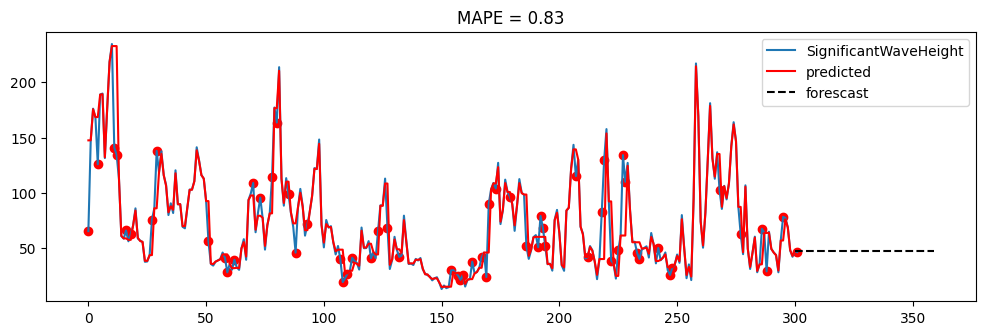

In [ ]:
plt.figure(figsize=(12,3.5))

sns.lineplot(df)
plt.scatter(X_test,y_test,color='r')
plt.plot(reg.predict(X),'r',label='predicted')
plt.plot(X_forecast, y_forecast, 'k--',label='forescast')

plt.title(f'MAPE = {mape:.2f}')
plt.legend(loc='upper right')

plt.show()

# Predição com componentes autoregressivas

In [ ]:
df[['SignificantWaveHeight-1']] = df[['SignificantWaveHeight']].shift()
df[['SignificantWaveHeight-2']] = df[['SignificantWaveHeight']].shift(2)
display(df.head())
df = df.dropna()
display(df.head())

,time,SignificantWaveHeight,SignificantWaveHeight-1,SignificantWaveHeight-2
0,2023-01-02 00:00:00+00:00,64.979167,NaN,NaN
1,2023-01-03 00:00:00+00:00,147.041667,64.979167,NaN
2,2023-01-04 00:00:00+00:00,176.166667,147.041667,64.979167
3,2023-01-05 00:00:00+00:00,168.062500,176.166667,147.041667
4,2023-01-06 00:00:00+00:00,125.666667,168.062500,176.166667


,time,SignificantWaveHeight,SignificantWaveHeight-1,SignificantWaveHeight-2
2,2023-01-04 00:00:00+00:00,176.166667,147.041667,64.979167
3,2023-01-05 00:00:00+00:00,168.062500,176.166667,147.041667
4,2023-01-06 00:00:00+00:00,125.666667,168.062500,176.166667
5,2023-01-07 00:00:00+00:00,189.041667,125.666667,168.062500
6,2023-01-08 00:00:00+00:00,189.893617,189.041667,125.666667


In [ ]:
def split_train_test(X, y, test_perc=0.2):

  test_size = int(len(df) * test_perc)
  train_size = len(df) - test_size

  X_train, y_train  = X[:train_size], y[:train_size]
  X_test, y_test = X[train_size:], y[train_size:]

  return X_train, y_train, X_test, y_test

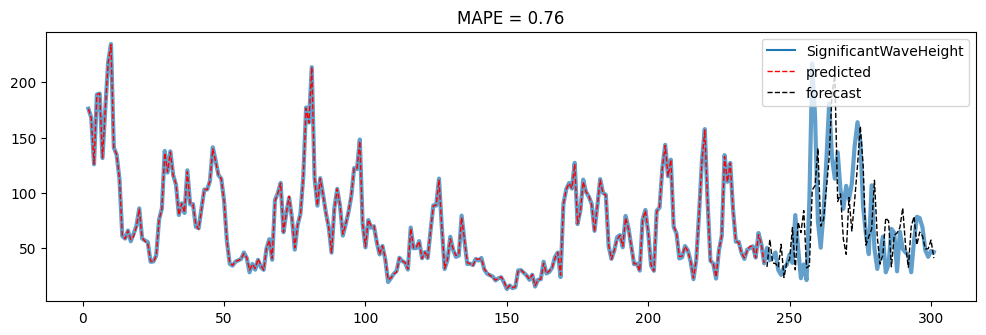

In [ ]:
X = df[['SignificantWaveHeight-1','SignificantWaveHeight-2']]
y = df[['SignificantWaveHeight']]

X_train, y_train, X_test, y_test = split_train_test(X, y, test_perc=0.2)

reg = XGBRegressor()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

mape = np.mean(np.abs(y_pred - y_test.values)/np.abs(y_test.values))

plt.figure(figsize=(12,3.5))

sns.lineplot(df[['SignificantWaveHeight']],lw=3,alpha=0.7)

plt.plot(np.arange(2,len(X_train)+2), reg.predict(X_train),'r--',lw=1,label='predicted')
plt.plot(np.arange(len(X_train)+2,len(X_train)+len(X_test)+2), reg.predict(X_test),'k--',lw=1,label='forecast')

plt.title(f'MAPE = {mape:.2f}')
plt.legend(loc='upper right')

plt.show()